**Текст задания:**   
Вы работаете аналитиком в приложении для онлайн-знакомств. Механика приложения следующая: пользователи видят в приложении анкеты друг друга и могут ставить друг другу лайки или дизлайки. Если пользователи поставили друг другу лайк – это называется мэтч, и у пользователей появляется возможность познакомиться.

Команда приложения разработала новый алгоритм для поиска наиболее подходящих анкет. Для проверки работы алгоритма был проведен АБ-тест. Все пользователи были разделены на две группы. Пользователи в группе с номером 0 пользовались приложением со старым алгоритмом. Все пользователи в группе 1 пользовались приложением с новым алгоритмом для поиска анкет.

Ваша задача – оценить, правда ли, что новый алгоритм улучшил качество сервиса. Для этого нужно выбрать метрики, которые отвечают за качество сервиса, и статистически сравнить эти метрики в двух группах.

В данных находится выгрузка логов взаимодействия пользователей друг с другом. Для каждой пары пользователей указано, из какой они группы АБ-теста и случился ли у них мэтч.

Результат вашей работы – аналитическое заключение с ответом на вопрос, стоит ли включать новую систему поиска анкет на всех пользователей.

# Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import pingouin as pg
import numpy as np

In [3]:
users = pd.read_csv(r'C:\Users\1\Desktop\Code\small_projects_repo\delivery_project\ab_users_data.csv')
users

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0


In [3]:
orders = pd.read_csv('~/data/ab_orders.csv')
orders

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"
...,...,...,...
4118,59422,2022-09-08 23:13:03.000000,"{84, 8, 24}"
4119,59439,2022-09-08 23:18:05.000000,"{9, 25, 75, 30, 6}"
4120,59464,2022-09-08 23:22:27.000000,"{60, 41, 46}"
4121,59487,2022-09-08 23:29:06.000000,"{9, 62, 77}"


In [4]:
products = pd.read_csv('~/data/ab_products.csv')
products

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0
...,...,...,...
82,83,вафли,55.0
83,84,мандарины,90.4
84,85,варенье,200.3
85,86,кофе холодный,70.3


# EDA

In [5]:
users.isna().sum()

user_id     0
order_id    0
action      0
time        0
date        0
group       0
dtype: int64

In [6]:
orders.isna().sum()

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


order_id         0
creation_time    0
product_ids      0
dtype: int64

In [7]:
products.isna().sum()

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


product_id    0
name          0
price         0
dtype: int64

Пропущенных значений нет

In [8]:
users.duplicated().sum()

0

In [9]:
orders.duplicated().sum()

0

In [10]:
products.duplicated().sum()

0

Дубликатов также нет

In [11]:
users['action'].value_counts()

create_order    4123
cancel_order     214
Name: action, dtype: int64

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   4337 non-null   int64 
 1   order_id  4337 non-null   int64 
 2   action    4337 non-null   object
 3   time      4337 non-null   object
 4   date      4337 non-null   object
 5   group     4337 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 203.4+ KB


In [13]:
users['date'] = pd.to_datetime(users['date'])
users['time'] = pd.to_datetime(users['time'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       4123 non-null   int64 
 1   creation_time  4123 non-null   object
 2   product_ids    4123 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.8+ KB


Также проверим размеры групп

In [15]:
users[users['group'] == 0]['order_id'].count()

1691

In [16]:
users[users['group'] == 1]['order_id'].count()

2646

Проверим количество отмененных заказов

In [17]:
users[users['action'] == 'cancel_order']['order_id'].count()

214

Так как они могли быть совершены по ошибке, значения для анализа они не имеют - считать процент отмененных заказов мы не будем - оно вряд ли даст нам представление о том, стала ли система рекоммендаций работать лучше

In [18]:
users = users[users['action'] != 'cancel_order']

Теперь разберемся, какую метрику использовать.   
Внедрена новая система рекоммендаций. Исходя из этого, можно сделать несколько предположений.   
1. Сумма заказа, прокси-метрика - количество позиций в заказе   
3. Количество заказов на пользователя

# 1. Сумма заказа

Соберем датафрейм с ценой каждого заказа и указанием, в какой он группе

In [19]:
orders['product_ids'] = orders['product_ids'].apply(lambda x: x.replace('{', '').replace('}', '').split(', '))

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       4123 non-null   int64 
 1   creation_time  4123 non-null   object
 2   product_ids    4123 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.8+ KB


In [21]:
orders_sum = orders.explode('product_ids').rename(columns={'product_ids': 'product_id'})

In [22]:
orders_sum['product_id'] = orders_sum['product_id'].astype('int')

In [23]:
orders_sum = orders_sum[['order_id', 'product_id']].merge(products[['product_id', 'price']], on='product_id', how='left')

In [24]:
orders_sum = orders_sum \
                    .groupby('order_id', as_index=False) \
                    .agg({'price': 'sum'}) \
                    .merge(users[['order_id', 'group']], on='order_id', how='left')

In [25]:
orders_sum

,order_id,price,group
0,1255,408.7,0
1,1256,250.5,1
2,1257,310.2,0
3,1258,85.0,0
4,1259,228.0,1
...,...,...,...
4118,59422,241.2,1
4119,59439,518.5,1
4120,59464,185.9,0
4121,59487,501.9,0


посмотрим, как распределяются суммы заказов в зависимости от группы

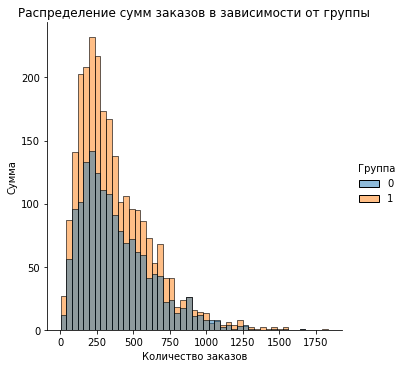

In [26]:
ax_sum = sns.displot(data=orders_sum.rename(columns={'group': 'Группа'}), x='price', hue='Группа')
ax_sum.set(title='Распределение сумм заказов в зависимости от группы', 
           xlabel='Количество заказов', 
           ylabel='Сумма')

Теперь проверим нормальность этих распределений. Хотя и так очевидно, что они не нормальны.

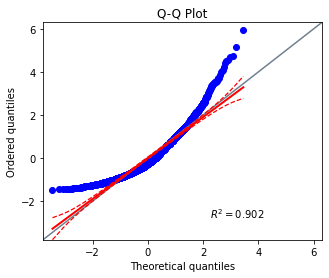

In [27]:
pg.qqplot(x=orders_sum[orders_sum['group'] == 1]['price'])

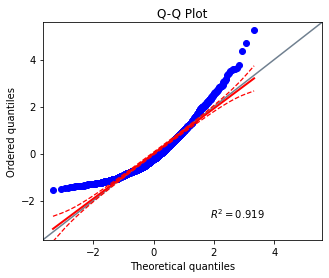

In [28]:
pg.qqplot(x=orders_sum[orders_sum['group'] == 0]['price'])

In [29]:
print(st.shapiro(orders_sum[orders_sum['group'] == 0]['price']))
print(st.shapiro(orders_sum[orders_sum['group'] == 1]['price']))

ShapiroResult(statistic=0.9185957908630371, pvalue=1.347362172388217e-28)
ShapiroResult(statistic=0.9023671746253967, pvalue=2.2913337444601104e-37)


In [30]:
sum_u_group_0 = orders_sum[orders_sum['group'] == 0]['price']
sum_u_group_1 = orders_sum[orders_sum['group'] == 1]['price']

Проверим через т-тест. Т-распределение асимптотически сходится к нормальному, поэтому при большом размере выборки мы можем проигнорировать требование о нормальности распределения переменной.

In [32]:
st.ttest_ind(sum_u_group_0, sum_u_group_1)

Ttest_indResult(statistic=1.4815692121713073, pvalue=0.13853141121218765)

Однако важно учесть, что т-тест все-таки не самый надежный тест в такой ситуации - распределение не нормальное, и хотя его применение допустимо, точность страдает.   
Поэтому для подстраховки стоит также применить наиболее подходящий и надежный в данной ситуации способ - бутстрап. Так как распределение скошенное и есть сильные выбросы, с помощью бутстрапа будем смотреть разницу медиан.

In [33]:
st.bootstrap((sum_u_group_0, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=310.0, high=338.0), standard_error=6.8978942363194955)

In [34]:
st.bootstrap((sum_u_group_1, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=295.3, high=319.0), standard_error=6.022431779042106)

При бутстрапировании мы получили, что доверительные интервалы медиан пересекаются - значит, у нас нет достаточных оснований, чтобы отвергнуть нулевую гипотезу.

## 1.2. Количество товаров в заказе

Хотя между суммами заказов тесты не выявили статистически значимой разницы, на всякий случай проверим прокси-метрику - количество товаров в заказе.

In [35]:
orders_col = orders[['order_id', 'product_ids']]
orders_col['product_ids'] = orders_col['product_ids'].apply(lambda x: len(x))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
orders_col = orders_col \
                    .rename(columns={'product_ids': 'total_products'}) \
                    .merge(users[['order_id', 'group']], on='order_id', how='left')
orders_col

,order_id,total_products,group
0,1255,4,0
1,1256,3,1
2,1257,4,0
3,1258,2,0
4,1259,4,1
...,...,...,...
4118,59422,3,1
4119,59439,5,1
4120,59464,3,0
4121,59487,3,0


Посмотрим на распределения

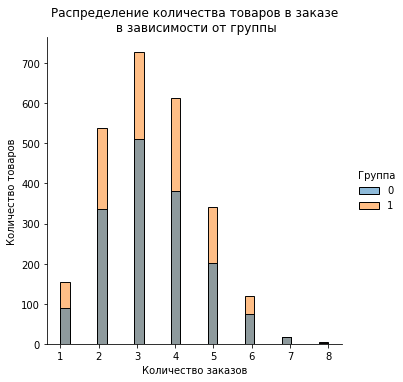

In [37]:
ax_col = sns.displot(data=orders_col.rename(columns={'group': 'Группа'}), x='total_products', hue='Группа')
ax_col.set(title='Распределение количества товаров в заказе\n в зависимости от группы', 
           xlabel='Количество заказов', 
           ylabel='Количество товаров')

Т-тест можно мспользовать как для непрерывных, так и для дискретных переменных при условии большого количества наблюдений. Поэтому используем его.

In [38]:
col_t_group_0 = orders_col[orders_col['group'] == 0]['total_products']
col_t_group_1 = orders_col[orders_col['group'] == 1]['total_products']

In [39]:
st.ttest_ind(col_t_group_0, col_t_group_1)

Ttest_indResult(statistic=-0.1380397717649213, pvalue=0.8902157292521864)

Для уверенности также попробуем Хи-квадрат.

In [40]:
col_cross = pd.crosstab(index=orders_col.total_products, columns=orders_col.group)
col_cross

group,0,1
total_products,,
1,89,155
2,336,537
3,510,728
4,381,612
5,201,342
6,75,119
7,16,17
8,1,4


In [41]:
st.chi2_contingency(col_cross)

(6.33608168847106,
 0.5010999570917679,
 7,
 array([[ 95.22095561, 148.77904439],
        [340.6880912 , 532.3119088 ],
        [483.1292748 , 754.8707252 ],
        [387.51806937, 605.48193063],
        [211.90565122, 331.09434878],
        [ 75.70846471, 118.29153529],
        [ 12.878244  ,  20.121756  ],
        [  1.95124909,   3.04875091]]))

Pvalue т-теста - 0.9, теста хи-квадрат - 0.5.  
Таким образом, оба теста не выявили статистически значимых различий.

# 3. Количество заказов на пользователя

Для начала проверим, что пользователи в групах не пересекаются

In [42]:
users[users['group'] == 0]['user_id'].isin(users[users['group'] == 1]['user_id']).sum()

0

In [43]:
orders_amount = users.groupby('user_id', as_index=False) \
                        .agg({'order_id': 'count', 'group': 'min'}) \
                        .rename(columns={'order_id': 'total_orders'})

In [44]:
orders_amount

,user_id,total_orders,group
0,964,2,0
1,965,9,1
2,966,1,0
3,967,5,1
4,968,3,0
...,...,...,...
1012,1976,5,1
1013,1977,4,1
1014,1978,7,1
1015,1979,6,1


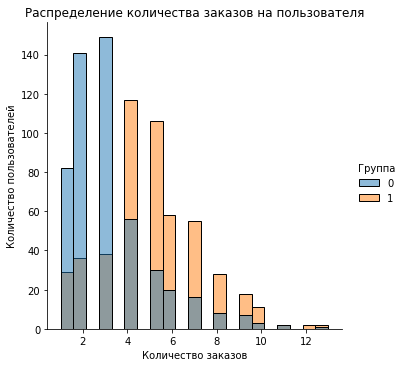

In [45]:
ax_am = sns.displot(data=orders_amount.rename(columns={'group': 'Группа'}), x='total_orders', hue='Группа')
ax_am.set(title='Распределение количества заказов на пользователя',
          xlabel='Количество заказов',
          ylabel='Количество пользователей')

Ситуация такая же, как и с количеством товаров в заказе - дискретная переменная. Поэтому используем те же методы.


Т-тест:

In [46]:
am_t_group_0 = orders_amount[orders_amount['group'] == 0]['total_orders']
am_t_group_1 = orders_amount[orders_amount['group'] == 1]['total_orders']

In [47]:
st.ttest_ind(am_t_group_0, am_t_group_1)

Ttest_indResult(statistic=-14.51086812343365, pvalue=1.6974865514796019e-43)

Pvalue позволяет отвергнуть нулевую гипотезу о том, что различий нет.

Хи-Квадрат:

In [48]:
amount_cross = pd.crosstab(index=orders_amount['total_orders'], columns=orders_amount['group'])
amount_cross

group,0,1
total_orders,,
1,82,29
2,141,36
3,149,38
4,56,117
5,30,106
6,20,58
7,16,55
8,8,28
9,7,18


In [49]:
st.chi2_contingency(amount_cross)

(280.13222774671647,
 6.889905084897996e-53,
 12,
 array([[56.20943953, 54.79056047],
        [89.63126844, 87.36873156],
        [94.69518191, 92.30481809],
        [87.60570305, 85.39429695],
        [68.86922321, 67.13077679],
        [39.49852507, 38.50147493],
        [35.95378564, 35.04621436],
        [18.2300885 , 17.7699115 ],
        [12.65978368, 12.34021632],
        [ 7.08947886,  6.91052114],
        [ 2.02556539,  1.97443461],
        [ 1.01278269,  0.98721731],
        [ 1.51917404,  1.48082596]]))

Pvalue так же достаточно мал, чтобы отвергнуть нулевую гипотезу.

Теперь удостоверимся, что различия в пользу нового алгоритма

In [50]:
print('Старый алгоритм:')
print('Среднее:', am_t_group_0.mean())
print('Медиана:', am_t_group_0.median())

Старый алгоритм:
Среднее: 3.124271844660194
Медиана: 3.0


In [51]:
print('Новый алгоритм:')
print('Среднее:', am_t_group_1.mean())
print('Медиана:', am_t_group_0.median())

Новый алгоритм:
Среднее: 5.00796812749004
Медиана: 3.0


Средние отличаются в пользу нового алгоритма.   
Медианы при этом одинаковы, что было ожидаемо по виду распределений, однако в случае старого алгоритма, перевес идет в сторону меньшего количества заказов, а в случае нового - в сторону большего.

# Вывод

Мы не можем отбросить гипотезы о том, что новый алгоритм не повлиял на количество товаров в заказах и их сумму, однако можно наблюдать статистически значимую разницу в количестве заказов, приходящихся на одного пользователя - с новым алгоритмом оно стало явно больше.   
***Таким образом, катим новый алгоритм в продакшн.***
